In [ ]:
import numpy as np
import matplotlib.pyplot as plt

forecast_ssrd6 = np.load('./resultsClassicalMBM/forecast_ssrd6_lt0.npy')
mbm_prediction_ssrd6 = np.load('./resultsClassicalMBM/mbm_prediction_ssrd6_lt0.npy')
observation_ssrd6 = np.load('./resultsClassicalMBM/observation_ssrd6_lt0.npy')


# Plot voor een bepaalde tijdstap
t = 0

vmin = min(forecast_ssrd6[t].min(), mbm_prediction_ssrd6[t].min(), observation_ssrd6[t].min())
vmax = max(forecast_ssrd6[t].max(), mbm_prediction_ssrd6[t].max(), observation_ssrd6[t].max())

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

im0 = axs[0].imshow(forecast_ssrd6[t], cmap='viridis', vmin=vmin, vmax=vmax)
axs[0].set_title("Originele forecast (ssrd6)")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(mbm_prediction_ssrd6[t], cmap='viridis', vmin=vmin, vmax=vmax)
axs[1].set_title("MBM correctie (ssrd6)")
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(observation_ssrd6[t], cmap='viridis', vmin=vmin, vmax=vmax)
axs[2].set_title("Waarneming (ssrd6_obs)")
fig.colorbar(im2, ax=axs[2])

plt.suptitle(f"Vergelijking SSRD6 op tijdstap {t}")
plt.tight_layout()
plt.show()


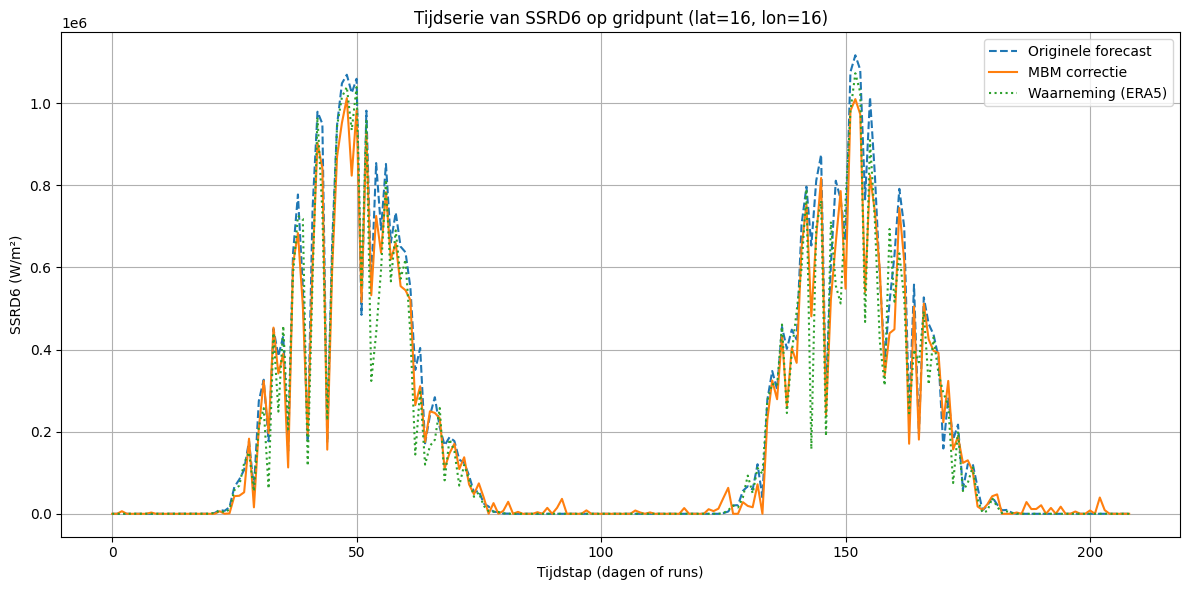

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Laad de data
forecast_ssrd6 = np.load('./resultsClassicalMBM/forecast_ssrd6_lt0.npy')
mbm_prediction_ssrd6 = np.load('./resultsClassicalMBM/mbm_prediction_ssrd6_lt0.npy')
observation_ssrd6 = np.load('./resultsClassicalMBM/observation_ssrd6_lt0.npy')

# Kies een gridpunt (bijv. centraal in het domein)
lat_idx = 16  # midden van 32
lon_idx = 16  # midden van 33

# Extract time series op dat punt
ts_forecast = forecast_ssrd6[:, lat_idx, lon_idx]
ts_mbm = mbm_prediction_ssrd6[:, lat_idx, lon_idx]
ts_obs = observation_ssrd6[:, lat_idx, lon_idx]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_forecast, label='Originele forecast', linestyle='--')
plt.plot(ts_mbm, label='MBM correctie', linestyle='-')
plt.plot(ts_obs, label='Waarneming (ERA5)', linestyle=':')
plt.xlabel("Tijdstap (dagen of runs)")
plt.ylabel("SSRD6 (W/m²)")
plt.title("Tijdserie van SSRD6 op gridpunt (lat=16, lon=16)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1816533/2638008529.py:31: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1816533/2638008529.py:31: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1816533/2638008529.py:31: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/tljh/user/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/tljh/user/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/tljh/user/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.ca

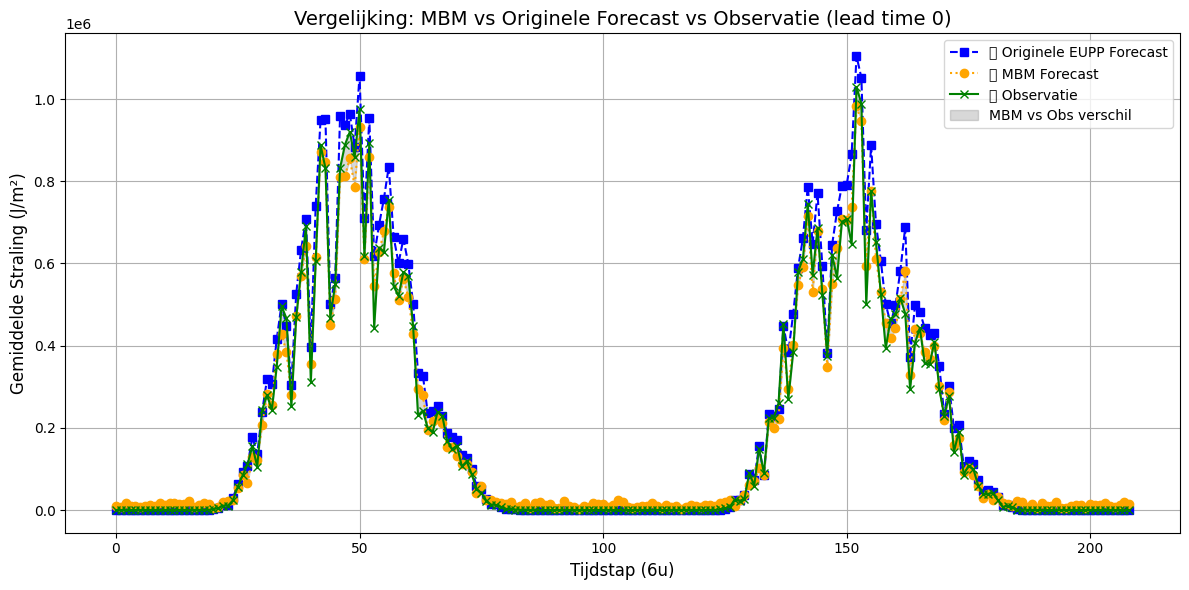

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
forecast = np.load('./resultsClassicalMBM/forecast_ssrd6_lt0.npy')  # shape: (tijd, lat, lon)
mbm = np.load('./resultsClassicalMBM/mbm_prediction_ssrd6_lt0.npy')
obs = np.load('./resultsClassicalMBM/observation_ssrd6_lt0.npy')

# Bereken gemiddelden over hele kaart per tijdstap
mean_forecast = forecast.mean(axis=(1, 2))  # over lat en lon
mean_mbm = mbm.mean(axis=(1, 2))
mean_obs = obs.mean(axis=(1, 2))

# Plot
tijdstappen = np.arange(len(mean_forecast))  # bv. 0 t/m 19

plt.figure(figsize=(12, 6))
plt.plot(tijdstappen, mean_forecast, 'b--s', label='📉 Originele EUPP Forecast')
plt.plot(tijdstappen, mean_mbm, 'orange', marker='o', linestyle=':', label='🔧 MBM Forecast')
plt.plot(tijdstappen, mean_obs, 'g-x', label='📏 Observatie')

# Shading tussen MBM en observatie (verschil)
plt.fill_between(tijdstappen, mean_mbm, mean_obs, color='gray', alpha=0.3, label='MBM vs Obs verschil')

# Labels en layout
plt.title("Vergelijking: MBM vs Originele Forecast vs Observatie (lead time 0)", fontsize=14)
plt.xlabel("Tijdstap (6u)", fontsize=12)
plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
